In [2]:
import numpy as np
import matplotlib.pyplot as plt
import operator

%matplotlib inline

FileNotFoundError: [Errno 2] No such file or directory: 'mushrooms.SO2.alpha=1.sampling=cyclic.init=self-init.dat'

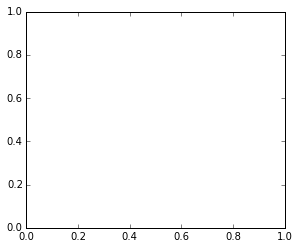

In [47]:
datasets = [
    'mushrooms', 'a9a',
    'cod-rna', 'ijcnn1'
]
alphas = [1, 1e-3, 1e-5]

# plot results
for dataset in datasets:
    fig = plt.figure()
    ax = fig.add_axes([0.15, 0.12, 0.6, 0.75])

    # find optimum value
    fopt = np.inf
    for alpha in alphas:    
        res = np.loadtxt(dataset + '.SO2.alpha=%g.sampling=cyclic.init=self-init.dat' % alpha, skiprows=1)
        fopt = min(fopt, res[-1, 2])
        
    # draw curves
    for alpha in alphas:    
        res = np.loadtxt(dataset + '.SO2.alpha=%g.sampling=cyclic.init=self-init.dat' % alpha, skiprows=1)
        ax.semilogy(res[:, 0], res[:, 2] - fopt, label=str(alpha), linewidth=3)
        
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Function minus optimum')
    ax.set_title('dataset=%s' % dataset)
        
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
    ax.grid()
        
    plt.savefig('alphas_%s_epoch.pdf' % dataset)